In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [51]:
def FDM(x: np.array, f: np.array, k: int, x0: float):
    x = x-x0
    n = x.shape[0]
    A = np.vander(x, n, increasing=True).T
    
    b = np.zeros(n)
    b[k] = math.factorial(k)

    return np.dot(np.linalg.solve(A, b), f)

In [55]:
def func(x: np.array):
    return np.exp(x)*np.sin(x)
def diff(x: np.array):
    return np.exp(x)*np.cos(x)+np.exp(x)*np.sin(x)

[200.38308082175396, -7.1882823499635435, -0.7422713995181738, -0.050761827776995005, -0.0032399423687081708, -0.00020354455438109653, -1.2737897066017467e-05, -7.963753319017997e-07, -4.978295464752591e-08, -3.1110971576708835e-09, -2.0480683815549128e-10, -3.5640823625726625e-11, -3.927880243281834e-11, 1.892885848064907e-11, 3.348077370901592e-11, -3.4486902222852223e-10, -2.4726887204451486e-11, -3.7397285268525593e-10, -2.3530333237431478e-09, -1.8873720364354085e-09]


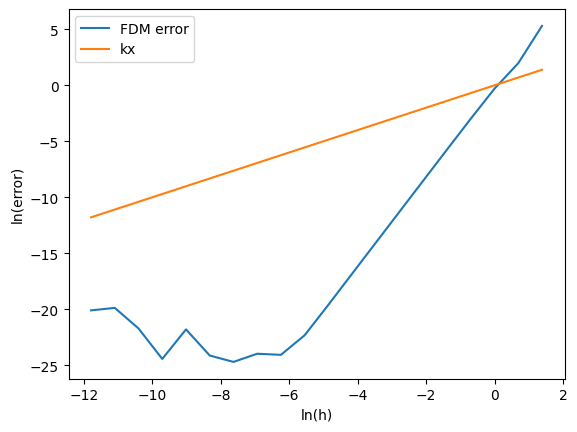

In [87]:
step = 2

res = []
h = []

for i in range(20):
    x0 = 5
    x = np.array([x0-2*step, x0-step, x0, x0+step, x0+2*step])
    res.append(FDM(x, func(x), 1, x0) - diff(x0))
    h.append(2*step)
    step/=2
print(res)
plt.plot(np.log(h), np.log(np.abs(res)))
plt.xlabel("ln(h)")
plt.ylabel("ln(error)")
plt.plot(np.log(h), np.log(h))
plt.legend(["FDM error", "kx"])